# Linear Regression

In regression, we are interested in predicting a scalar-valued target, such as the price of a stock. By linear, we mean that the target must be predicted as a linear function of the inputs. This is a kind of supervised learning algorithm; recall that, in supervised learning, we have a collection of training examples labeled with the correct outputs. In order to formulate a learning problem mathematically, we need to define two things: a model and a loss function.

**The model** defines the set of allowable hypotheses, or functions that compute predictions from the inputs.In the case of linear regression, the model simply consists of linear functions given by:
$$
y = \sum_j w_jx_j + b
$$

where $w$ is the weights, and $b$ is an intercept term, which we'll call the bias

**Loss function** defines how well the model fit the data and thus show how far off the prediction $y$ is from the target $t$ and given as:

$$
\mathcal{L(y,t)} = \frac{1}{2}(y - t)^2
$$

When we combine our model and loss function, we get an optimization problem, where we are trying to minimize a cost function with respect to the model parameters (i.e. the weights and bias).The cost function is simply the loss, averaged over all the training examples.

\begin{align}
\varepsilon (w_1\ldots w_D,b) & = \frac{1}{N}\sum_{i=1}^N \mathcal{L}(y^{(i)},t^{(i)})\\
& = \frac{1}{2N}\sum_{i=1}^N (y^{(i)} - t^{(i)})^2\\
&=\frac{1}{2N}\sum_{i=1}^N \left(\sum_j w_jx_j^{(i)} + b -t^{(i)} \right)
\end{align}

In vectorized form: 
\begin{equation} 
\mathbf{\varepsilon} =\frac{1}{2N}||\mathbf{y-t}||^2 =\frac{1}{2N}\mathbf{(y - t)^T(y-t)} \quad \text{where}\quad \mathbf{y = wx} 
\end{equation}

**The python implementation of the cost function (vectorized) is shown below:**


In [2]:
# Python imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np # Matrix and vector computation package
from ploting import *
# Allow matplotlib to plot inside this notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5.0) # set default size of plots
import seaborn as sns
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=42)
latexify(fig_width=6)

In [3]:
x = np.random.uniform(0, 1, 100)
noise_variance = 0.2  
noise = np.random.randn(x.shape[0]) * noise_variance
y = x*2 + noise

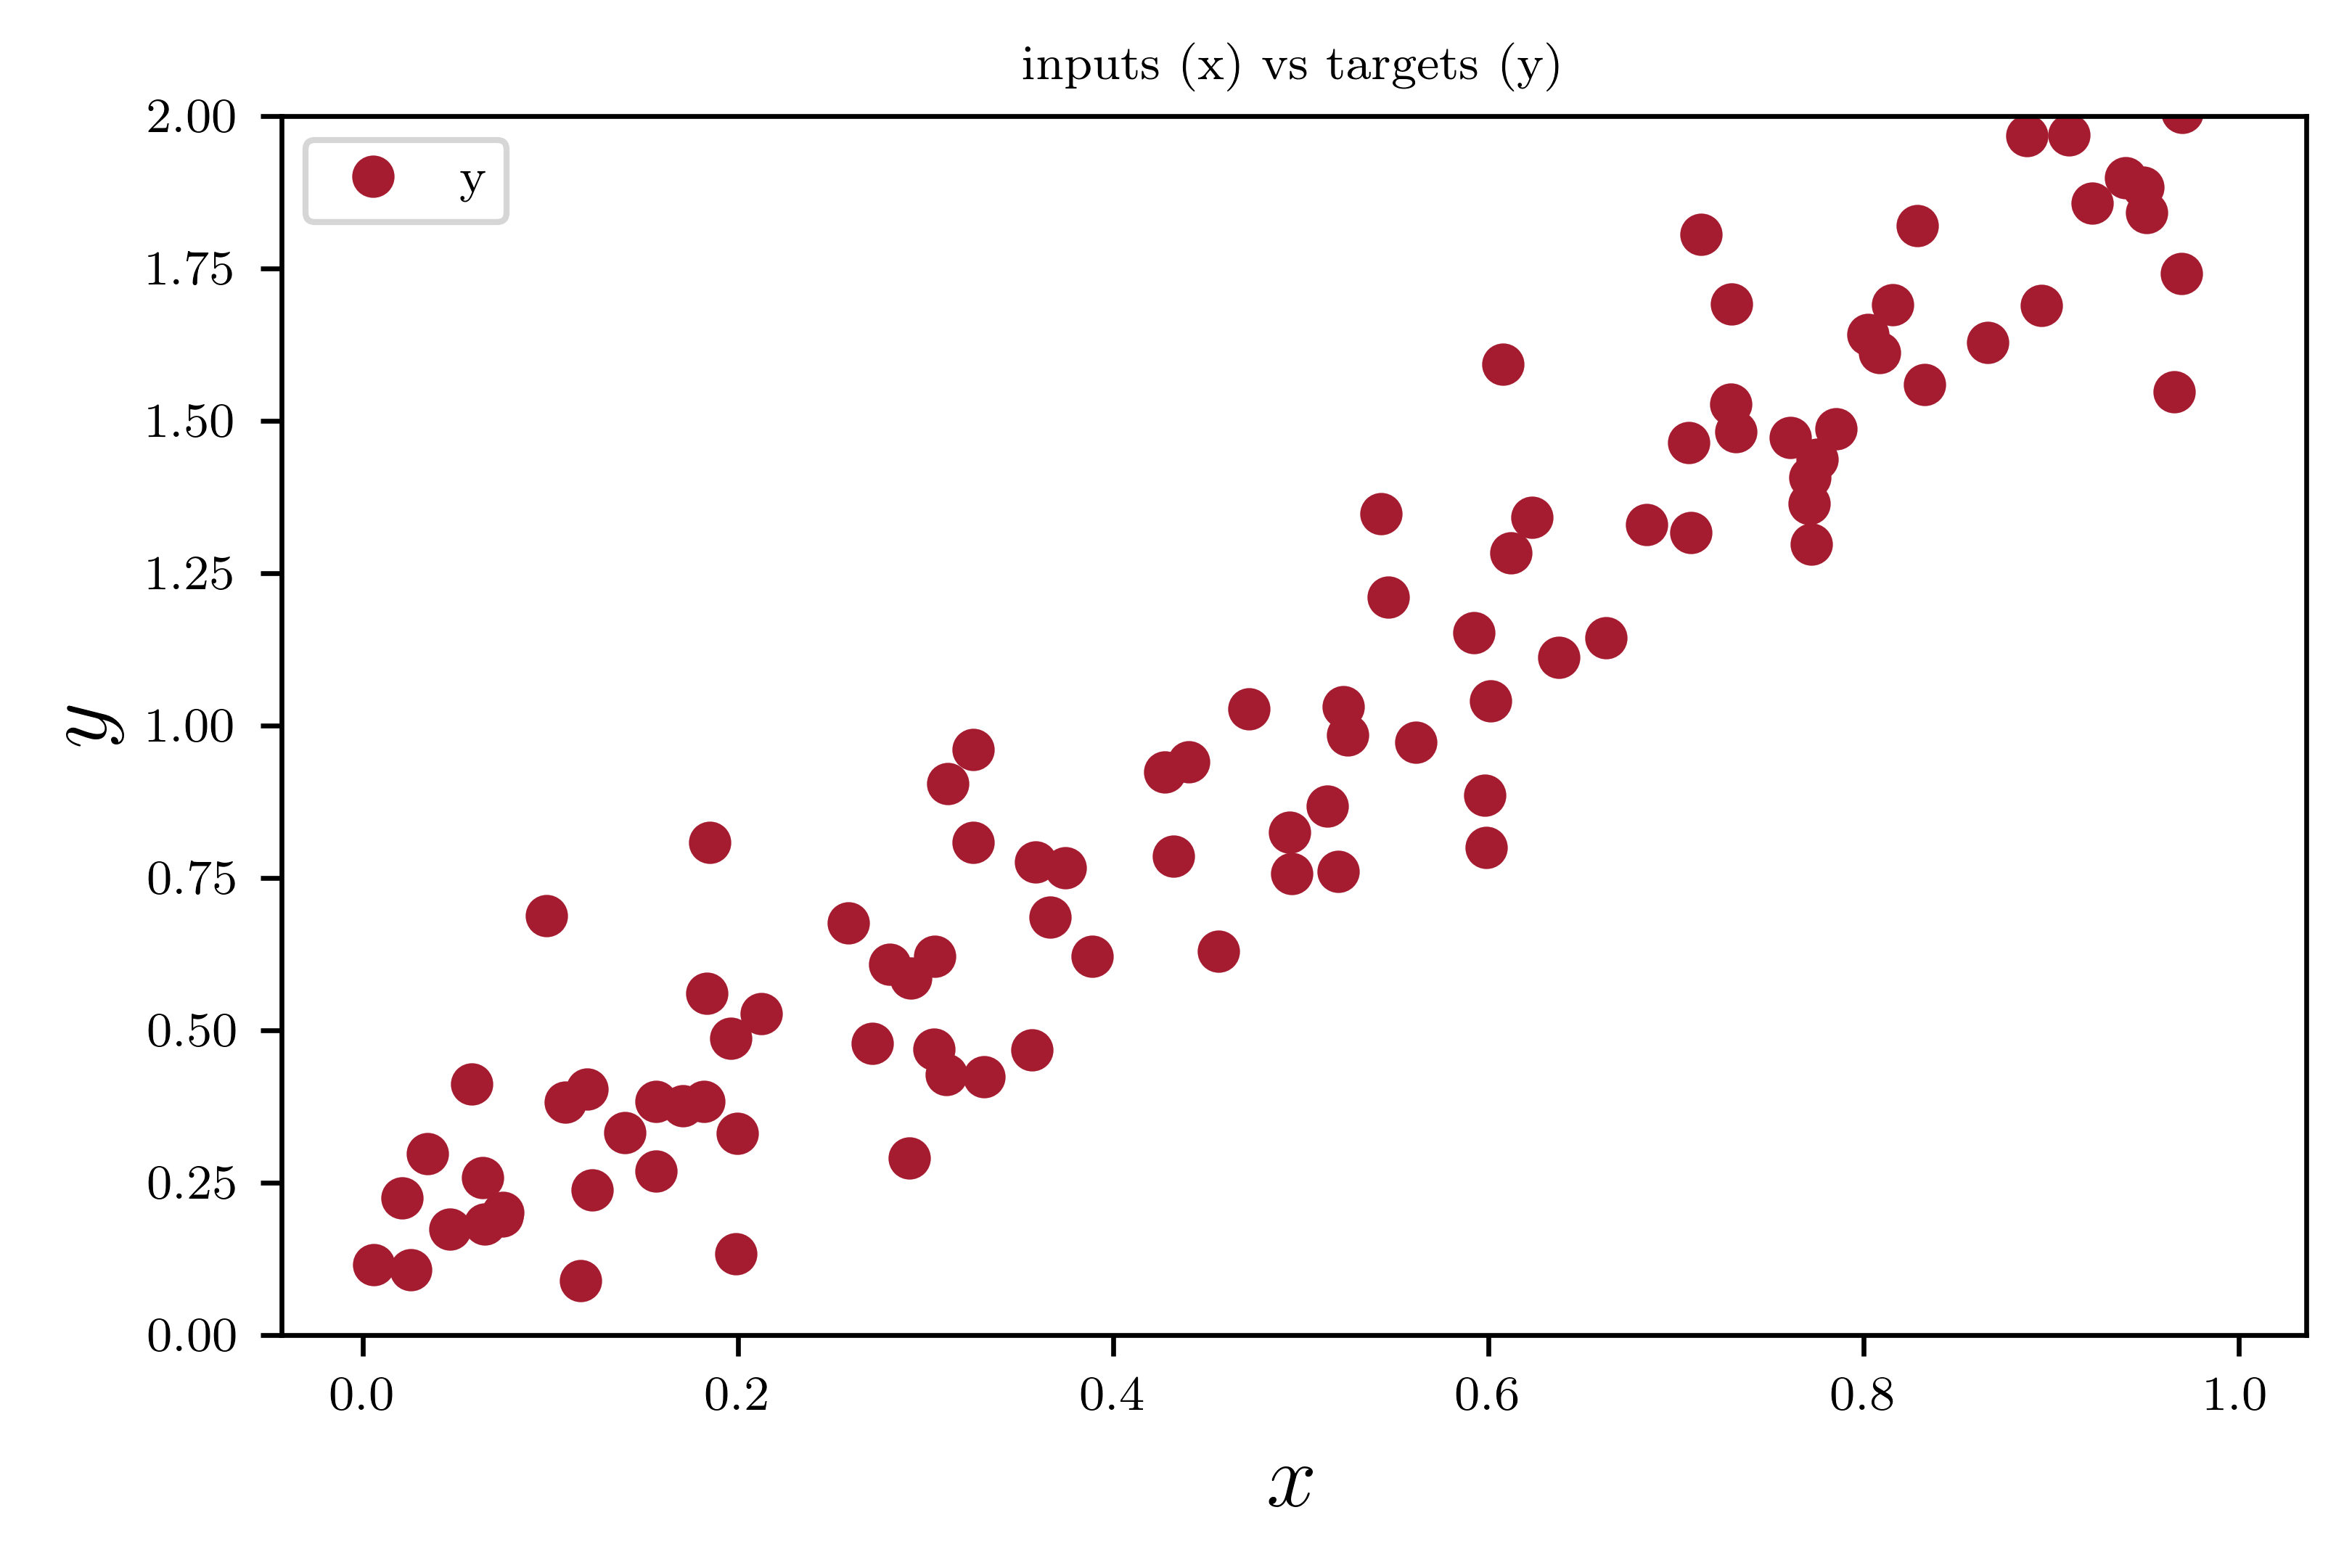

In [4]:
# Plot the target t versus the input x
plt.plot(x, y, 'o', label='y')
# Plot the initial line
#plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.legend(loc=2)

## Define loss function

In [5]:
def loss(x, w, y):
    h = np.matmul(x,w.T)
    loss = (h - y)
    return loss

# Define cost function

In [6]:
def cost(x,w, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `x` and targets `t`, at weights `w1`, `w2` and `b`.
    '''
    N= x.shape[0]
    
    J=(loss(x, w,y) **2).sum() / (2.0 * N)
    
    return J

## Plot the cost vs the given weight w

In [7]:
#Reshape x data to be NxD matrix
x_in = x.reshape(-1, 1)
np.shape(x_in)

(100, 1)

In [8]:
ws = np.linspace(0,4,num=100)
ws = ws.reshape(-1,1)
c = lambda w: cost(x_in, w , y)
cost_ws = np.array([c(w) for w in ws])

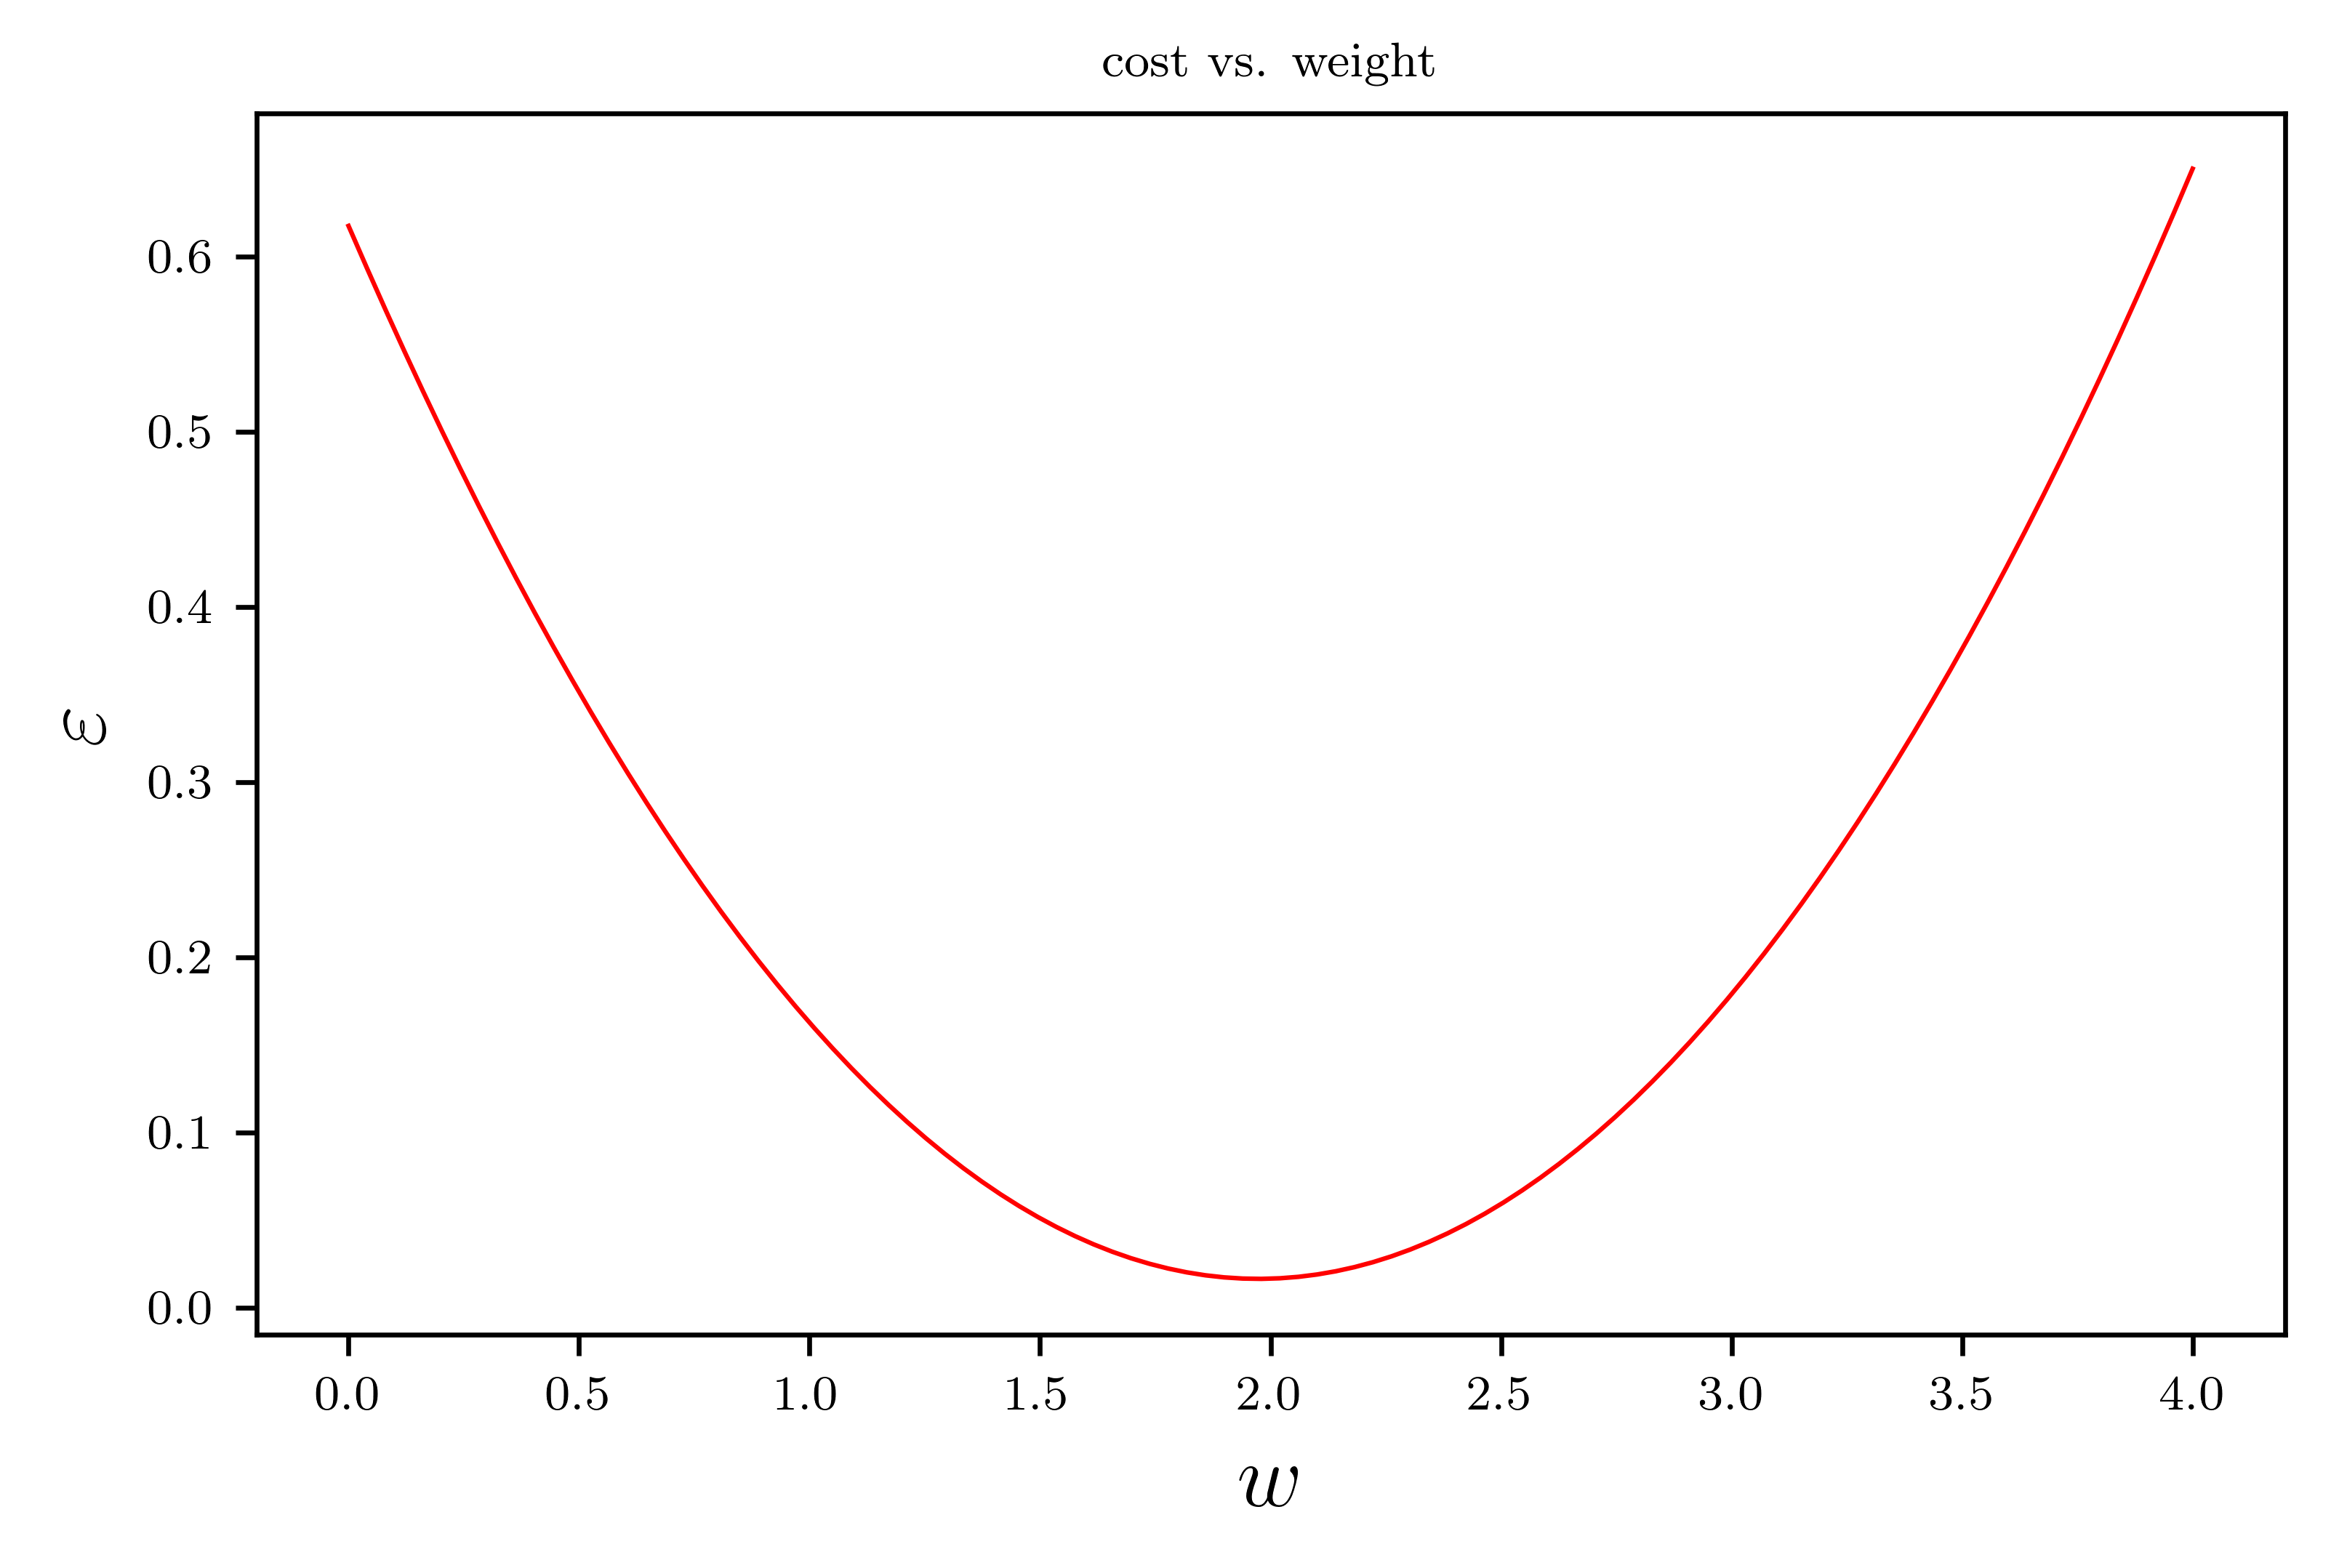

In [9]:
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\varepsilon$', fontsize=15)
plt.title('cost vs. weight')
plt.show() 

## Gradient Descent
The optimization algorithm commonly used to train machine learning is the gradient descent algorithm. The gradient descent algorithm works by taking the derivative of the cost function $\varepsilon$ with respect to the parameters at a specific position on this cost function, and updates the parameters in the direction of the negative gradient. The entries of the gradient vector are simply the partial derivatives with respect to each of the variables: 
$$
\frac{\partial \mathbf{\varepsilon}}{\partial \mathbf{w}} = \begin{pmatrix}
\frac{\partial \varepsilon}{\partial w_1}\\
\vdots\\
\frac{\partial \varepsilon}{\partial w_D}
\end{pmatrix}
$$
The parameter $\mathbf{w}$ is iteratively updated by taking steps proportional to the negative of the gradient:

\begin{align}
\mathbf{w_{t+1}} &= \mathbf{ w_t }- \alpha \frac{\partial \mathbf{\varepsilon}}{\partial \mathbf{w}}\\
& = \mathbf{w_t} - \mathbf{\frac{\alpha}{N}x^T(y-t)}
\end{align}
In coordinate systems:
\begin{equation}
w_{t+1} = w_t - \alpha \frac{1}{N}\sum_{i=1}^{N} x_t (y^{(i)}-t^{(i)})
\end{equation}

The gradient  descent is implemented by the gradient(w, x, t) and solve_gradient functions below

In [10]:
def gradient(x, w, y):
    N = x.shape[0]
    gradient = (1.0/ float(N)) * np.matmul(np.transpose(x), loss(x,w,y))
    return gradient

In [11]:
def solve_gradient(x, y,  alpha=0.1, tolerance=1e-2):
    N, D = np.shape(x)
    #w = np.random.randn(D)
    w = np.zeros([D])
    # Perform Gradient Descent
    iterations = 1
    w_cost = [(w, cost(x,w, y))]
    while True:
        dw = gradient(x, w, y)
        w_k = w - alpha * dw
        w_cost.append((w, cost(x, w, y)))
        # Stopping Condition
        if np.sum(abs(w_k - w)) < tolerance:
            print ("Converged.")
            break
        if iterations % 100 == 0:
            print ("Iteration: %d - cost: %.4f" %(iterations, cost(x, w, y)))
        iterations += 1
        w = w_k
    return  w, w_cost

In [12]:
w_grad, w_cost = solve_gradient(x_in,  y)

Converged.


In [14]:
w_grad

array([1.65334979])

Notice in the previous outcome that the gradient descent algorithm quickly converges towards the target value around  2.02.0 . Let's try to plot these iterations of the gradient descent algorithm to visualize it more.

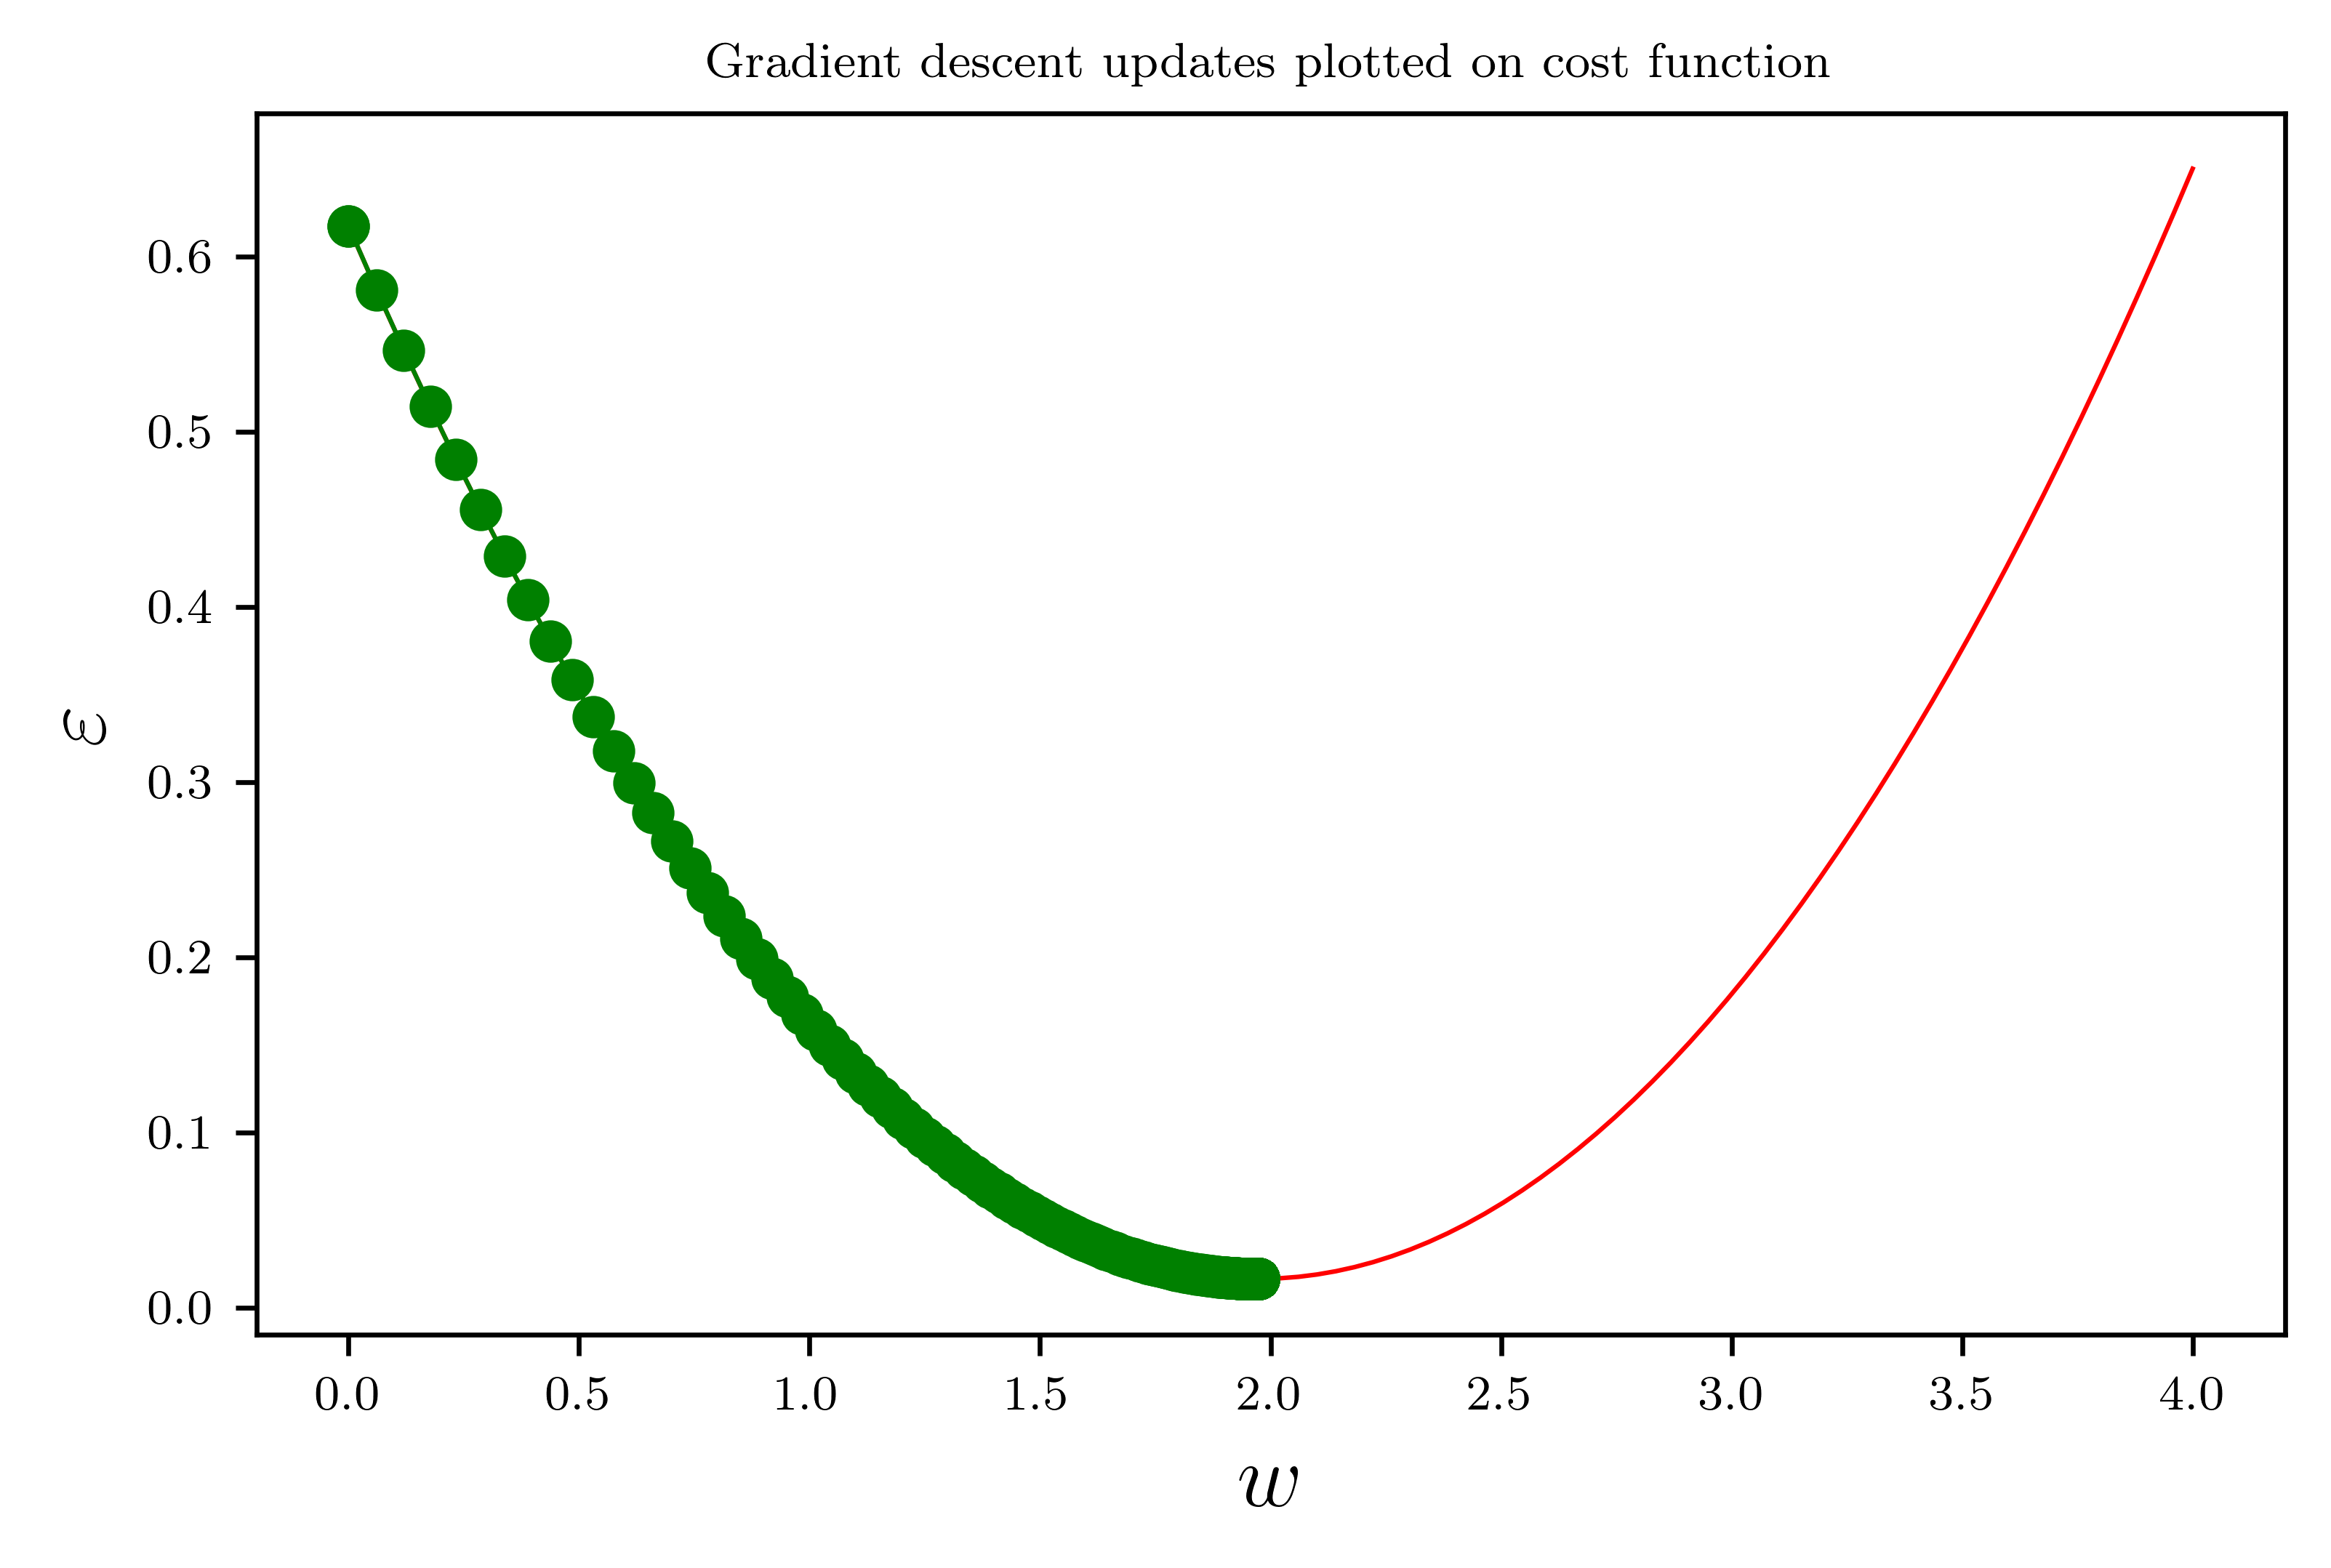

In [17]:
# Plot the gradient descent updates when torelence is 1e-2
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'go')
    plt.plot([w1, w2],[c1, c2], 'g-')
    #plt.text(w1, c1, '$w({})$'.format(i)) 
# Show figure
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\varepsilon$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.show()

The last figure shows the gradient descent updates of the weight parameters for 20 iterations. The green dots represent the weight parameter values $w(k)$ at iteration $k$. Notice how the update differs from the position of the weight and the gradient at that point. 

In [15]:
w_grad2, w_cost = solve_gradient(x_in,  y,  tolerance=1e-7)

Iteration: 100 - cost: 0.0176
Iteration: 200 - cost: 0.0164
Iteration: 300 - cost: 0.0164
Iteration: 400 - cost: 0.0164
Converged.


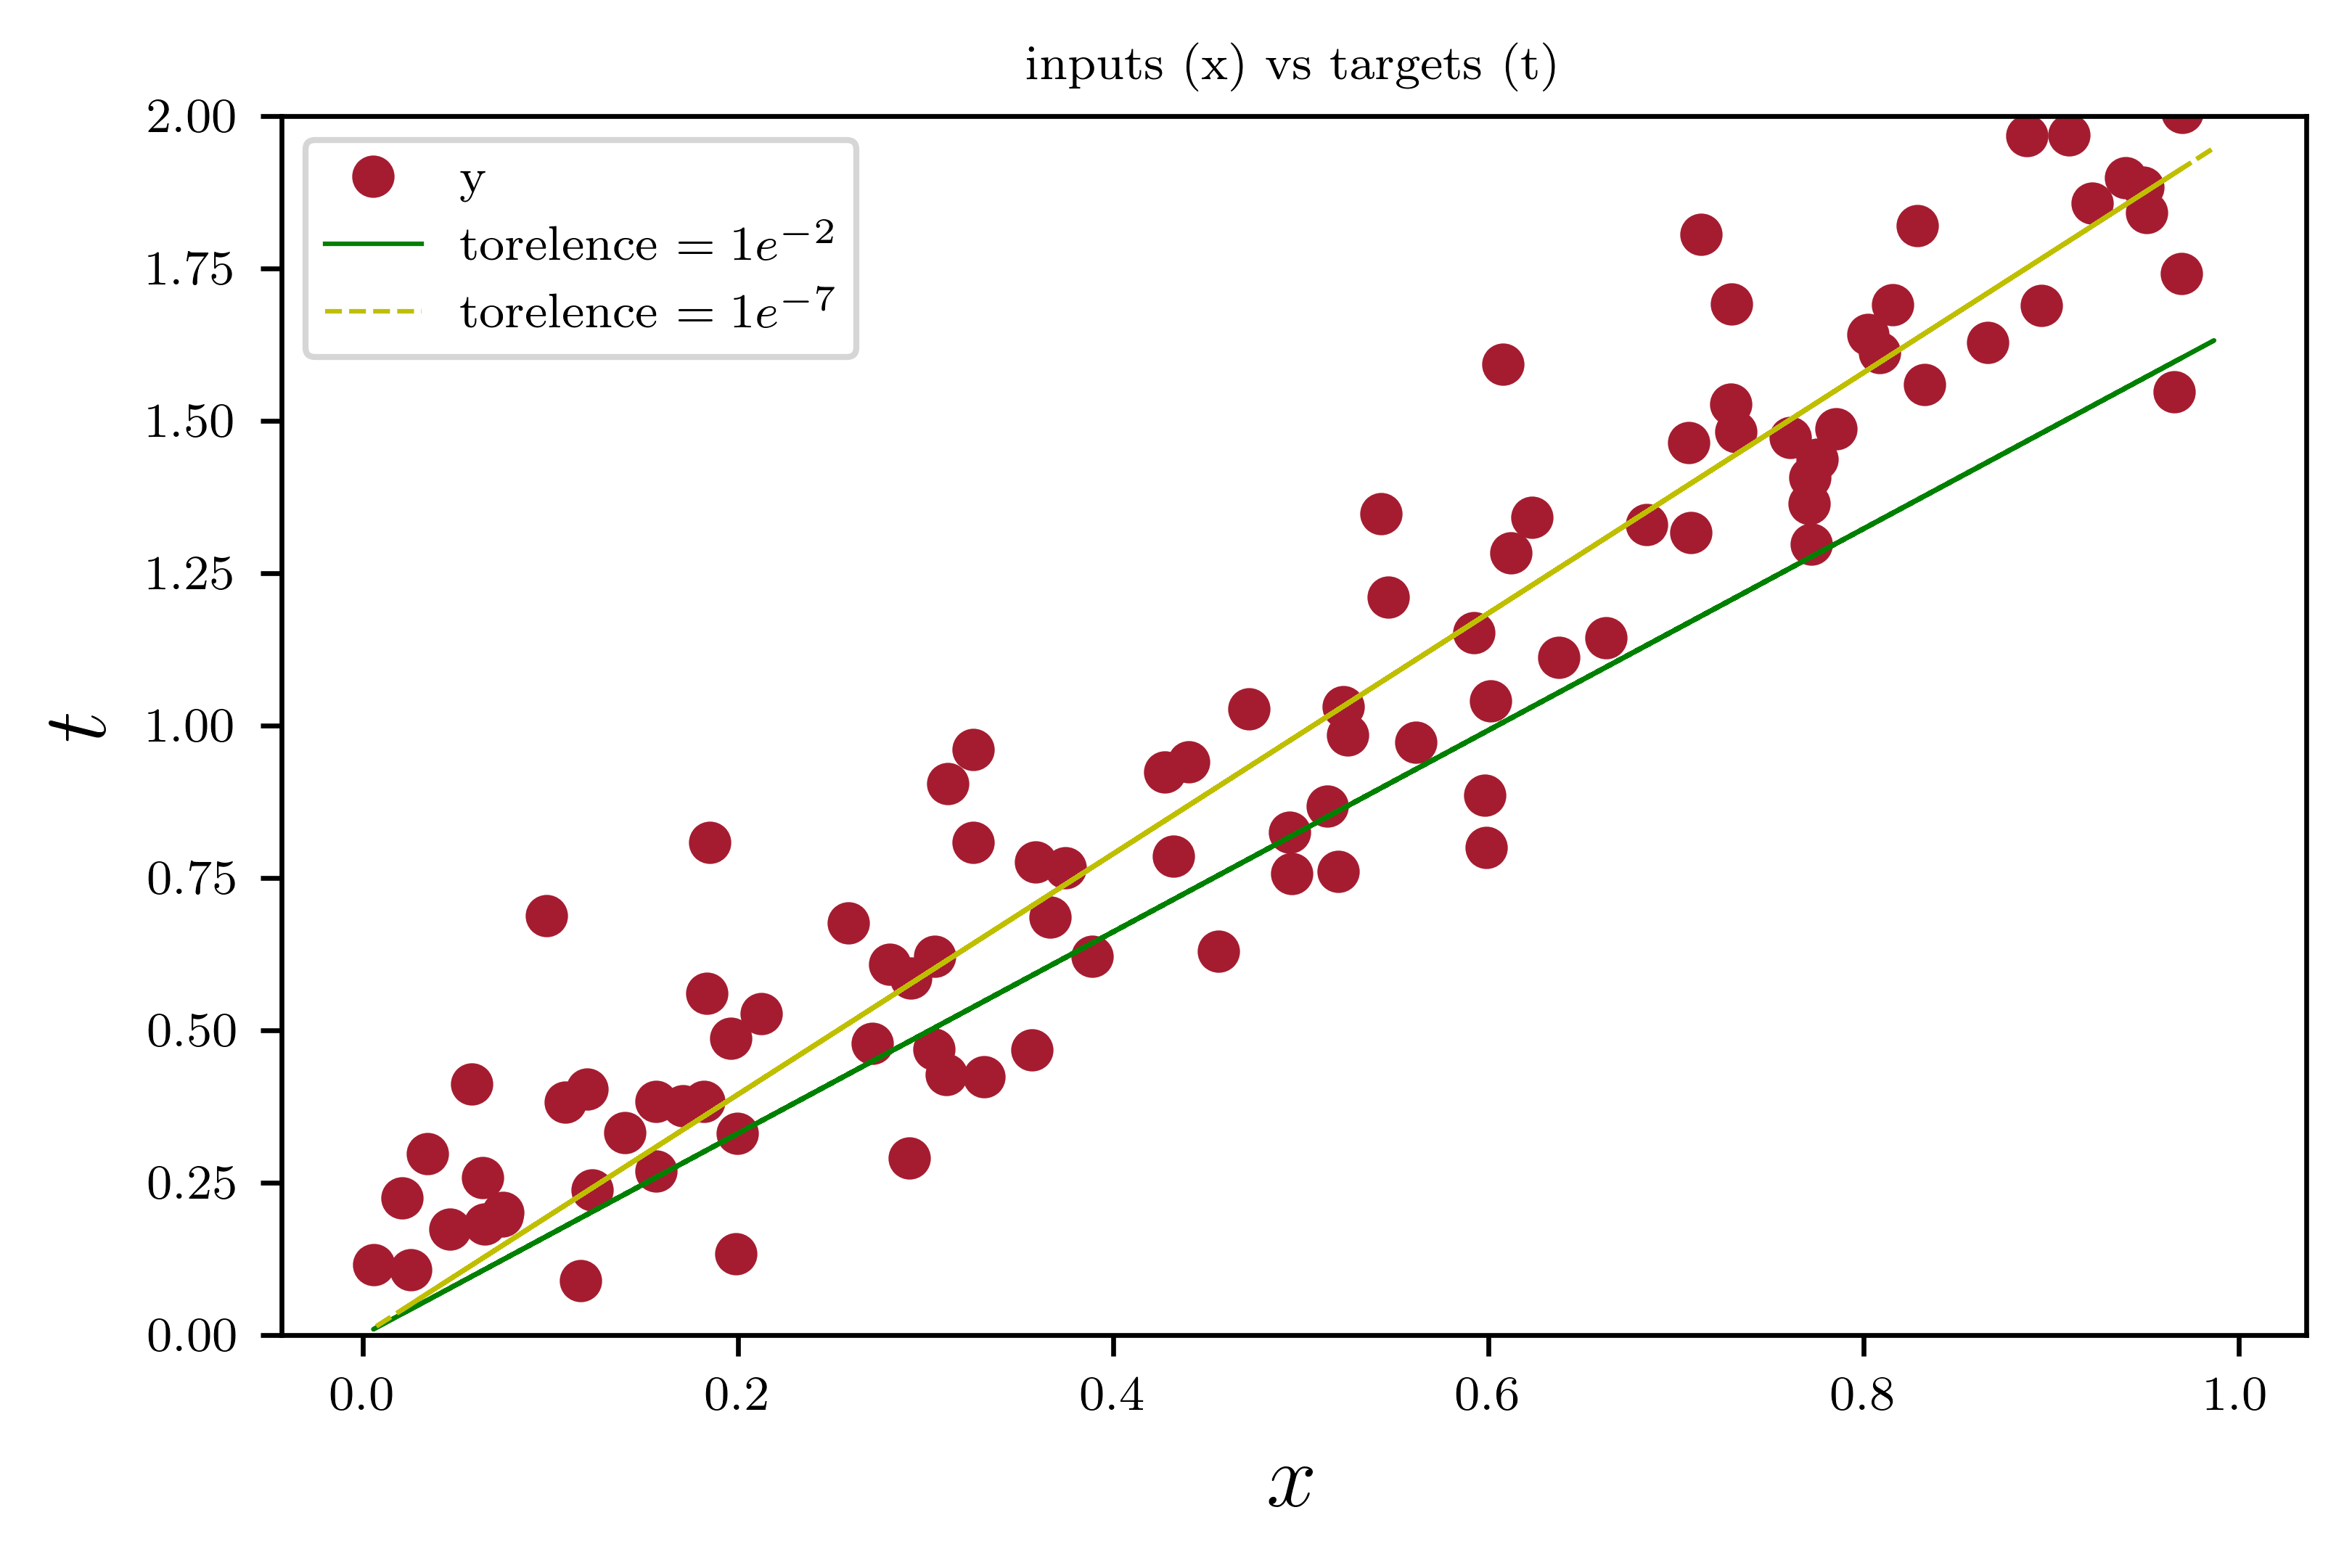

In [16]:
# Plot the target t versus the input x 
plt.plot(x, y, 'o', label='y')
# Plot the initial line
plt.plot(x,np.dot(x_in, w_grad), 'g-', label='torelence $=1e^{-2}$')
plt.plot(x,np.dot(x_in, w_grad2), 'y--', label='torelence $=1e^{-7}$')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (t)')

plt.legend(loc=2)

In [ ]:
# Plot the first  gradient descent updates when torelence is 1e-7
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'go')
    plt.plot([w1, w2],[c1, c2], 'g-')
    #plt.text(w1, c1, '$w({})$'.format(i)) 
# Show figure
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\varepsilon$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.show()

The regression line fitted by gradient descent with 20 and 100000 iterations is shown in the figure below. The fitted line (red) lies close to the original line (blue), which is what we tried to approximate via the noisy samples. Notice that both lines go through point $(0,0)$, this is because we didn't have a bias term, which represents the intercept, the intercept at $x=0$ is thus $t=0$.

## Generalization

The goal of a learning algorithm is not to only to make correct predictions on
the training examples; but it should be  generalized to examples  not seen
seen before. The average squared error on novel examples is known as the
**generalization error**, and we'd like this to be as small as possible. In practice, we nor-
mally tune model parameters by partitioning the dataset into three different
subsets:
1. The training set is used to train the model.
2. The validation set is used to estimate the generalization error of each hyperparameter setting.
3. The test set is used at the very end, to estimate the generalization error of the final model, once all hyperparameters have been chosen.

## Practical Example
In this example, the targets $\mathbf{t}$ will be the temperature and feature will be the latitude. Let visulize the scatter plot between temperature and latitude to see if their are correlated.

In [ ]:
data = pd.read_csv('data/Cities.csv')

In [ ]:
features = ['latitude']
target = ['temperature']
targetVal = data[target]
featureVal = data[features]

In [ ]:
# Standardize the features
for i in range(1):
    featureVal.iloc[:,i] = (featureVal.iloc[:,i] / featureVal.iloc[:,i].max())

In [ ]:
# Standardize the target
for i in range(1):
    targetVal.iloc[:,i] = (targetVal.iloc[:,i] / targetVal.iloc[:,i].max())

In [ ]:
y = np.array(targetVal)

In [ ]:
# Add bias term to feature data
b = np.ones((featureVal.shape[0], 1))
X = np.hstack((b, featureVal))

In [ ]:
# randomly separate data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [ ]:
plt.plot(data['latitude'], data['temperature'], 'o', label='t')
# Plot the initial line
#plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$Latitude$', fontsize=15)
plt.ylabel('$Temperature$', fontsize=15)
#plt.ylim([0,2])
plt.title('Temp vs Latitude')


Use gradient descent to find model parameters:

In [ ]:
def z_value(x,w):
    z = x.dot(w.T)
    return z.reshape(len(z), 1)

In [ ]:
def gradient(x, w, t):
    N, D = np.shape(x)
    y = z_value(x,w)
    error = y-t
    dw = x.T.dot(error)
    cost = error.sum() / (2.0 * N)
    return dw.T, cost

In [ ]:
w = np.zeros([2])
dw, cost = gradient(X_train, w, y_train)
w_k = w - (0.01 * dw)*(1.0/len(X_train))
print(w_k)

In [ ]:
def gradientD(x, t, alpha=0.1, tolerance=1e-4):
    N, D = np.shape(x)
    w = np.zeros([D])
    iterations = 1
    while True:
        dw, cost = gradient(x, w, t)
        w_k = w - (alpha * dw)*(1.0/N)
        # Stopping Condition
        if np.sum(abs(w_k - w)) < tolerance:
            print ("Converged.")
            break
        if iterations % 100 == 0:
            print ("Iteration: %d - cost: %.4f" %(iterations, cost))
        iterations += 1
        w = w_k
    return  w

In [ ]:
w_g=gradientD(X_train, y_train, alpha=0.05, tolerance=1e-8)

In [ ]:
print('Coefficient', w_g)

Now that you learned the parameters of the model, you can use the model to predict whether a particular student will be admited.

In [ ]:
x =np.array(featureVal)
plt.plot(featureVal, targetVal, 'o', label='t')
plt.plot(x, z_value(X,w_g), 'r-', label='$y = \mathbf{w^Tx + b}$')
plt.xlabel('$Latitude$', fontsize=15)
plt.ylabel('$Temperature$', fontsize=15)
plt.title('Temp vs Latitude')
plt.legend()

# ML with Scikit-Learn

It's worth noting that we don't HAVE to implement any algorithms from scratch to solve ML problems. Most of the ML algorithms have been implemented in python. The top Python library for ML is [scikit-learn](http://scikit-learn.org/stable/).

Scikit-learn is simple and efficient tool for data mining and data analysis accessible to everybody, and reusable in various contexts. It is built on NumPy, SciPy, and matplotlib.

### Let us repeat the above example with Scikit-Learn

In [ ]:
# import the model
from sklearn import linear_model

# instantiate the model
reg = linear_model.LinearRegression()


# learn model parameters from the data
reg.fit(X_train,y_train)

In [ ]:
print ('coefficients', reg.coef_)
print ('intercept', reg.intercept_)

# Reference

* [CSC321 Intro to Neural Networks and Machine Learning](http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/)
* [Supervised and Unsupervised Machine Learning Algorithms](http://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/)
* [House_Price_Prediction_Part_1](https://www.kaggle.com/arthurtok/d/harlfoxem/housesalesprediction/feature-ranking-w-randomforest-rfe-linear-models)